<h1>Содержание<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Подготовка-данных" data-toc-modified-id="Подготовка-данных-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Подготовка данных</a></span></li><li><span><a href="#Исследование-задачи" data-toc-modified-id="Исследование-задачи-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>Исследование задачи</a></span><ul class="toc-item"><li><span><a href="#Случайный-лес" data-toc-modified-id="Случайный-лес-2.1"><span class="toc-item-num">2.1&nbsp;&nbsp;</span>Случайный лес</a></span><ul class="toc-item"><li><span><a href="#Вывод" data-toc-modified-id="Вывод-2.1.1"><span class="toc-item-num">2.1.1&nbsp;&nbsp;</span>Вывод</a></span></li></ul></li><li><span><a href="#Решающее-дерево" data-toc-modified-id="Решающее-дерево-2.2"><span class="toc-item-num">2.2&nbsp;&nbsp;</span>Решающее дерево</a></span><ul class="toc-item"><li><span><a href="#Вывод" data-toc-modified-id="Вывод-2.2.1"><span class="toc-item-num">2.2.1&nbsp;&nbsp;</span>Вывод</a></span></li></ul></li></ul></li><li><span><a href="#Борьба-с-дисбалансом" data-toc-modified-id="Борьба-с-дисбалансом-3"><span class="toc-item-num">3&nbsp;&nbsp;</span>Борьба с дисбалансом</a></span><ul class="toc-item"><li><span><a href="#Обновление-модели-случайного-леса" data-toc-modified-id="Обновление-модели-случайного-леса-3.1"><span class="toc-item-num">3.1&nbsp;&nbsp;</span>Обновление модели случайного леса</a></span><ul class="toc-item"><li><span><a href="#Вариант-1-(без-учета-class_weight)" data-toc-modified-id="Вариант-1-(без-учета-class_weight)-3.1.1"><span class="toc-item-num">3.1.1&nbsp;&nbsp;</span>Вариант 1 (без учета class_weight)</a></span></li><li><span><a href="#Вариант-2-(без-увеличенной-выборки)" data-toc-modified-id="Вариант-2-(без-увеличенной-выборки)-3.1.2"><span class="toc-item-num">3.1.2&nbsp;&nbsp;</span>Вариант 2 (без увеличенной выборки)</a></span></li></ul></li><li><span><a href="#Обновление-модели-решающего-дерева" data-toc-modified-id="Обновление-модели-решающего-дерева-3.2"><span class="toc-item-num">3.2&nbsp;&nbsp;</span>Обновление модели решающего дерева</a></span><ul class="toc-item"><li><span><a href="#Вариант-1-(без-учета-class_weight)" data-toc-modified-id="Вариант-1-(без-учета-class_weight)-3.2.1"><span class="toc-item-num">3.2.1&nbsp;&nbsp;</span>Вариант 1 (без учета class_weight)</a></span></li><li><span><a href="#Вариант-2-(без-увеличенной-выборки)" data-toc-modified-id="Вариант-2-(без-увеличенной-выборки)-3.2.2"><span class="toc-item-num">3.2.2&nbsp;&nbsp;</span>Вариант 2 (без увеличенной выборки)</a></span></li></ul></li><li><span><a href="#ROC-кривые-для-моделей-с-увеличенной-выборкой" data-toc-modified-id="ROC-кривые-для-моделей-с-увеличенной-выборкой-3.3"><span class="toc-item-num">3.3&nbsp;&nbsp;</span>ROC-кривые для моделей с увеличенной выборкой</a></span></li><li><span><a href="#ROC-кривые-для-моделей-с-class_weight" data-toc-modified-id="ROC-кривые-для-моделей-с-class_weight-3.4"><span class="toc-item-num">3.4&nbsp;&nbsp;</span>ROC-кривые для моделей с class_weight</a></span></li><li><span><a href="#Вывод" data-toc-modified-id="Вывод-3.5"><span class="toc-item-num">3.5&nbsp;&nbsp;</span>Вывод</a></span></li></ul></li><li><span><a href="#Тестирование-модели" data-toc-modified-id="Тестирование-модели-4"><span class="toc-item-num">4&nbsp;&nbsp;</span>Тестирование модели</a></span></li><li><span><a href="#Чек-лист-готовности-проекта" data-toc-modified-id="Чек-лист-готовности-проекта-5"><span class="toc-item-num">5&nbsp;&nbsp;</span>Чек-лист готовности проекта</a></span></li></ul></div>

# Отток клиентов

Из «Бета-Банка» стали уходить клиенты. Каждый месяц. Немного, но заметно. Банковские маркетологи посчитали: сохранять текущих клиентов дешевле, чем привлекать новых.

Нужно спрогнозировать, уйдёт клиент из банка в ближайшее время или нет. Вам предоставлены исторические данные о поведении клиентов и расторжении договоров с банком. 

Постройте модель с предельно большим значением *F1*-меры. Чтобы сдать проект успешно, нужно довести метрику до 0.59. Проверьте *F1*-меру на тестовой выборке самостоятельно.

Дополнительно измеряйте *AUC-ROC*, сравнивайте её значение с *F1*-мерой.

Источник данных: [https://www.kaggle.com/barelydedicated/bank-customer-churn-modeling](https://www.kaggle.com/barelydedicated/bank-customer-churn-modeling)

## Подготовка данных

In [1]:
# импорт библиотек для исследования
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression 
from sklearn.metrics import confusion_matrix, f1_score , roc_auc_score, roc_curve 
from sklearn.utils import shuffle

In [2]:
# откроем файл и заполним пропуски
df = pd.read_csv(r'C:\Users\Spline\Desktop\Yandex Practicum\command_string_and_git\Churn.csv')
df['Tenure'] = df['Tenure'].fillna(0)
# уберем лишние столбцы, которые помешают при получении дополнительных данных
df_cor = df.drop(['CustomerId', 'Surname', 'RowNumber'], axis=1)
df_ohe = pd.get_dummies(df_cor, drop_first=True)
# обозначим признаки и цели
target = df_ohe['Exited']
features = df_ohe.drop('Exited', axis=1)
# проведем деление на выборки в соотношении 60:20:20
features_train, features_test, target_train, target_test = train_test_split(features, target, test_size=0.4, stratify=target, random_state=57117)
features_test, features_valid, target_test, target_valid = train_test_split(features_test, target_test, test_size=0.5, random_state=57117)
# выведем размеры выборок на экран
display(features_train.shape)
display(features_valid.shape)
display(features_test.shape)

(6000, 11)

(2000, 11)

(2000, 11)

In [3]:
# стандартизируем данные и настроим на признаках
scaler = StandardScaler()
scaler.fit(features_train) 
# преобразуем выборки
features_train = scaler.transform(features_train)
features_valid = scaler.transform(features_valid) 
features_test = scaler.transform(features_test) 
# уберем предупреждение `SettingWithCopy`
pd.options.mode.chained_assignment = None
# получим заголовки для признаков и скорректируем преобразованные выборки
column_list = list(features.columns)
features_train = pd.DataFrame(features_train, columns = column_list, index=target_train.index)
features_valid = pd.DataFrame(features_valid, columns = column_list, index=target_valid.index)
features_test = pd.DataFrame(features_test, columns = column_list, index=target_test.index)

## Исследование задачи

### Случайный лес

In [4]:
%%time
# обозначим переменные для получения лучших результатов используя цикл
f1_score_one = 0
best_est = 0
max_depth_one = 0
# используем цикл
for est in range(1, 10):
    for max_m in range(1, 50):
        for min_leaf in range(2,8):
            model_one = RandomForestClassifier(random_state=57117, n_estimators=est, max_depth=max_m, min_samples_leaf=min_leaf) 
            model_one.fit(features_train, target_train)  
            predictions_valid = model_one.predict(features_valid) 
            result_one = f1_score(target_valid, predictions_valid)   
            if result_one > f1_score_one:       
                f1_score_one = result_one
                max_depth_one = max_m
                best_est = est
                best_min_leaf = min_leaf
# выведем результаты    
display(f'Результат наилучшей модели: {f1_score_one}, при количестве "деревьев": {best_est}, глубине: {max_m} и количестве листьев: {min_leaf}')
display(confusion_matrix(target_valid, predictions_valid))

'Результат наилучшей модели: 0.6428571428571429, при количестве "деревьев": 8, глубине: 49 и количестве листьев: 7'

array([[1544,   57],
       [ 200,  199]], dtype=int64)

CPU times: total: 1min 43s
Wall time: 1min 44s


#### Вывод

Результат наилучшей модели для случайного леса составил: 0.642, при количестве "деревьев" : 8, и глубине: 49

### Решающее дерево

In [5]:
# обозначим переменные для получения лучших результатов
depth_max = 0
f1_score_two = 0
# используем цикл
for depth in range(1, 10):
    model_two = DecisionTreeClassifier(random_state=57117, max_depth=depth)
    model_two.fit(features_train, target_train)
    predictions_valid_two = model_two.predict(features_valid)
    result_two = f1_score(target_valid, predictions_valid_two)
    if result_two > f1_score_two:
        depth_max = depth
        f1_score_two = result_two
# выведем результаты           
display(f'Результат наилучшей модели: {f1_score_two}, при глубине модели: {depth_max}')
display(confusion_matrix(target_valid, predictions_valid_two))

'Результат наилучшей модели: 0.6017441860465116, при глубине модели: 7'

array([[1498,  103],
       [ 184,  215]], dtype=int64)

#### Вывод

Результат наилучшей модели для решающего дерева составил: 0.601, при глубине модели: 7

## Борьба с дисбалансом

0    7963
1    2037
Name: Exited, dtype: int64

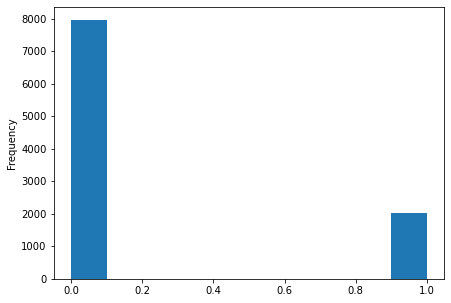

In [6]:
# выведем график с дисбалансом классов и рассчитаем их количество
target.plot(xlabel='Exited', kind='hist', figsize=(7,5), legend=False);
target.value_counts()

In [7]:
# создадим функцию для уведичения выборки
def upsample(features, target, repeat):
    features_zeros = features[target == 0]
    features_ones = features[target == 1]
    target_zeros = target[target == 0]
    target_ones = target[target == 1]
    features_upsampled = pd.concat([features_zeros] + [features_ones] * repeat)
    target_upsampled = pd.concat([target_zeros] + [target_ones] * repeat)
    features_upsampled, target_upsampled = shuffle(features_upsampled, target_upsampled, random_state=57117)
    return features_upsampled, target_upsampled
# применим функцию на тренировочной выборке
features_upsampled, target_upsampled = upsample(features_train, target_train, 4)

### Обновление модели случайного леса

#### Вариант 1 (без учета class_weight)

In [8]:
# обучим заново модель случайного леса с учетом баланса классов 
model_one_cor = RandomForestClassifier(random_state=57117, n_estimators=8, max_depth=49, min_samples_leaf=7) 
model_one_cor.fit(features_upsampled, target_upsampled)
predicted_valid_one_cor = model_one_cor.predict(features_valid)
# выведем результат на экран
display("Значение результата F1 для модели случайного леса с учетом увеличения выборки:", f1_score(target_valid, predicted_valid_one_cor))
# рассчитаем вероятности на валидационной выборке
probabilities_valid_one = model_one_cor.predict_proba(features_valid)
probabilities_valid_one_a = probabilities_valid_one[:, 1]
auc_roc_one = roc_auc_score(target_valid, probabilities_valid_one_a)
# посчитаем площадь под кривой
display('AUC-ROC для случайного леса:', auc_roc_one)

'Значение результата F1 для модели случайного леса с учетом увеличения выборки:'

0.6063249727371864

'AUC-ROC для случайного леса:'

0.8533568462067098

#### Вариант 2 (без увеличенной выборки)

In [9]:
# обучим заново модель случайного леса с учетом баланса классов 
model_one_cor_weight = RandomForestClassifier(random_state=57117, n_estimators=8, max_depth=49, min_samples_leaf=7, class_weight='balanced') 
model_one_cor_weight.fit(features_train, target_train)
predicted_valid_one_cor_weight = model_one_cor_weight.predict(features_valid)
# выведем результат на экран
display("Значение результата F1 для модели случайного леса с учетом баланса классов:", f1_score(target_valid, predicted_valid_one_cor_weight))
# рассчитаем вероятности на валидационной выборке
probabilities_valid_one_weight = model_one_cor_weight.predict_proba(features_valid)
probabilities_valid_one_a_weight = probabilities_valid_one_weight[:, 1]
auc_roc_one_weight = roc_auc_score(target_valid, probabilities_valid_one_a_weight)
# посчитаем площадь под кривой
display('AUC-ROC для случайного леса:', auc_roc_one_weight)

'Значение результата F1 для модели случайного леса с учетом баланса классов:'

0.6076233183856502

'AUC-ROC для случайного леса:'

0.8578801782720387

### Обновление модели решающего дерева

#### Вариант 1 (без учета class_weight)

In [10]:
# обучим заново модель решающего дерева с учетом баланса классов
model_two_cor = DecisionTreeClassifier(random_state=57117, max_depth=7)
model_two_cor.fit(features_upsampled, target_upsampled)
predicted_valid_two_cor = model_two_cor.predict(features_valid)
# выведем результат на экран
display("Значение результата F1 для модели решающего дерева с учетом баланса классов:", f1_score(target_valid, predicted_valid_two_cor))
# рассчитаем вероятности на валидационной выборке
probabilities_valid_two = model_two_cor.predict_proba(features_valid)
probabilities_valid_two_a = probabilities_valid_two[:, 1]
auc_roc_two = roc_auc_score(target_valid, probabilities_valid_two_a)
# посчитаем площадь под кривой
display('AUC-ROC для модели решающего дерева:', auc_roc_two)

'Значение результата F1 для модели решающего дерева с учетом баланса классов:'

0.5588785046728972

'AUC-ROC для модели решающего дерева:'

0.8295551495853939

#### Вариант 2 (без увеличенной выборки)

In [11]:
# обучим заново модель решающего дерева с учетом баланса классов
model_two_cor_weight = DecisionTreeClassifier(random_state=57117, max_depth=7, class_weight='balanced')
model_two_cor_weight.fit(features_train, target_train)
predicted_valid_two_cor_weight = model_two_cor_weight.predict(features_valid)
# выведем результат на экран
display("Значение результата F1 для модели решающего дерева с учетом баланса классов:", f1_score(target_valid, predicted_valid_two_cor_weight))
# рассчитаем вероятности на валидационной выборке
probabilities_valid_two_weight = model_two_cor_weight.predict_proba(features_valid)
probabilities_valid_two_a_weight = probabilities_valid_two_weight[:, 1]
auc_roc_two_weight = roc_auc_score(target_valid, probabilities_valid_two_a_weight)
# посчитаем площадь под кривой
display('AUC-ROC для модели решающего дерева:', auc_roc_two_weight)

'Значение результата F1 для модели решающего дерева с учетом баланса классов:'

0.5636192271442036

'AUC-ROC для модели решающего дерева:'

0.8314767242904263

### ROC-кривые для моделей с увеличенной выборкой

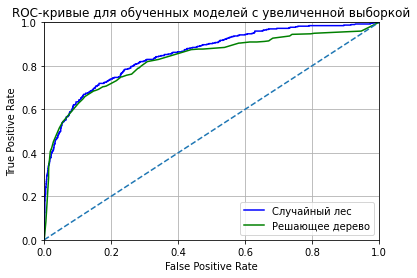

In [17]:
# рассчитаем значения FPR, TPR и порога
fpr_one, tpr_one, thresholds_one = roc_curve(target_valid, probabilities_valid_one_a) 
fpr_two, tpr_two, thresholds_two = roc_curve(target_valid, probabilities_valid_two_a) 

# построим график с сеткой
plt.figure()
plt.grid(True)
plt.plot(fpr_one, tpr_one, color='b')
plt.plot(fpr_two, tpr_two, color='g')

# ROC-кривая случайной модели 
plt.plot([0, 1], [0, 1], linestyle='--')
# установим границы осей от 0 до 1
plt.ylim([0.0, 1.0])
plt.xlim([0.0, 1.0])
# подшишем оси
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
# укажем заголовок
plt.title('ROC-кривые для обученных моделей с увеличенной выборкой')
plt.legend(['Случайный лес', 'Решающее дерево'])
plt.show()

### ROC-кривые для моделей с class_weight

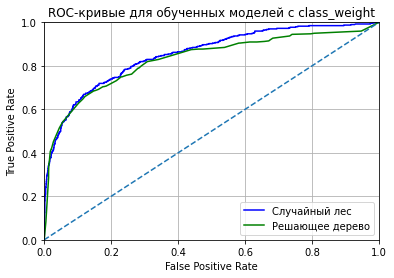

In [18]:
# рассчитаем значения FPR, TPR и порога
fpr_one_weight, tpr_one_weight, thresholds_one_weight = roc_curve(target_valid, probabilities_valid_one_a_weight) 
fpr_two_weight, tpr_two_weight, thresholds_two_weight = roc_curve(target_valid, probabilities_valid_two_a_weight) 
 
# построим график с сеткой
plt.figure()
plt.grid(True)
plt.plot(fpr_one, tpr_one, color='b')
plt.plot(fpr_two, tpr_two, color='g')

# ROC-кривая случайной модели 
plt.plot([0, 1], [0, 1], linestyle='--')
# установим границы осей от 0 до 1
plt.ylim([0.0, 1.0])
plt.xlim([0.0, 1.0])
# подшишем оси
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
# укажем заголовок
plt.title('ROC-кривые для обученных моделей с class_weight')
plt.legend(['Случайный лес', 'Решающее дерево'])
plt.show()

### Вывод

- Для случайного леса
    - Значение результата F1 для модели случайного леса c увеличенной выборкой: 0.606
    - Площадь под кривой AUC-ROC: 0.853
    - Значение результата F1 для модели случайного леса с class_weight: 0.607
    - Площадь под кривой AUC-ROC: 0.857
- Для решающего дерева
    - Значение результата F1 для модели решающего дерева с увеличенной выборкой: 0.558
    - Площадь под кривой AUC-ROC: 0.829
    - Значение результата F1 для модели решающего дерева с class_weight: 0.563
    - Площадь под кривой AUC-ROC: 0.831

## Тестирование модели

In [16]:
# объединим обучающие и валидационные выборки 
features_train_valid = pd.concat([features_train, features_valid])
target_train_valid = pd.concat([target_train, target_valid])

# обучим модель на выборке полученной соединением обучающей и валидационной
model_test = RandomForestClassifier(random_state=57117, n_estimators=8, max_depth=49, min_samples_leaf=7, class_weight='balanced') 
model_test.fit(features_train_valid, target_train_valid)

# тестирование модели случайного леса
predictions_test = model_test.predict(features_test) 
result_test = f1_score(target_test, predictions_test)

probabilities_test = model_test.predict_proba(features_test)
probabilities_test_a = probabilities_test[:, 1]
auc_roc_test = roc_auc_score(target_test, probabilities_test_a)

# выведем результат на экран
display(f'Результат модели случайного леса на тестовой выборке: {result_test}')
display(f'Площадь под кривой AUC-ROC: {auc_roc_test}')

'Результат модели случайного леса на тестовой выборке: 0.5928489042675894'

'Площадь под кривой AUC-ROC: 0.8490455941627817'

## Чек-лист готовности проекта

Поставьте 'x' в выполненных пунктах. Далее нажмите Shift+Enter.

- [x]  Jupyter Notebook открыт
- [x]  Весь код выполняется без ошибок
- [x]  Ячейки с кодом расположены в порядке исполнения
- [x]  Выполнен шаг 1: данные подготовлены
- [x]  Выполнен шаг 2: задача исследована
    - [x]  Исследован баланс классов
    - [x]  Изучены модели без учёта дисбаланса
    - [x]  Написаны выводы по результатам исследования
- [x]  Выполнен шаг 3: учтён дисбаланс
    - [x]  Применено несколько способов борьбы с дисбалансом
    - [x]  Написаны выводы по результатам исследования
- [x]  Выполнен шаг 4: проведено тестирование
- [x]  Удалось достичь *F1*-меры не менее 0.59
- [x]  Исследована метрика *AUC-ROC*